In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
matches=pd.read_csv("matches.csv")

In [4]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
delivery=pd.read_csv("deliveries.csv")

In [6]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
matches.shape

(756, 18)

In [8]:
delivery.shape

(179078, 21)

In [9]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [11]:
delivery.groupby(["match_id","inning"]).sum()["total_runs"]

match_id  inning
1         1         207
          2         172
2         1         184
          2         187
3         1         183
                   ... 
11413     2         170
11414     1         155
          2         162
11415     1         152
          2         157
Name: total_runs, Length: 1528, dtype: int64

In [14]:
totalruns_df=delivery.groupby(["match_id","inning"]).sum()["total_runs"].reset_index()
totalruns_df.head()

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183


In [17]:
#capturing only first innings as we are predicting second innings
totalruns_df=totalruns_df[totalruns_df["inning"]==1]
totalruns_df["total_runs"]=totalruns_df["total_runs"].apply(lambda x:x+1)
totalruns_df.head()

,match_id,inning,total_runs
0,1,1,210
2,2,1,187
4,3,1,186
6,4,1,166
8,5,1,160


In [18]:
matches.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [19]:
"""
Merging the first inning scores df with the matches df ,
where left side merging is done on "id" column of the matches and risght side merging is done on the "match_id" column of the totalrun_df

"""

match_df=matches.merge(totalruns_df[["match_id","total_runs"]],left_on="id",right_on="match_id")

match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,210
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,187
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,186
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,166
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,146
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,139
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,174
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,158


In [20]:
match_df["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [21]:
teams = ["Sunrisers Hyderabad" , "Mumbai Indians" , "Royal Challengers Bangalore" , "Kolkata Knight Riders" , "Kings XI Punjab" , "Chennai Super Kings","Rajasthan Royals", "Delhi Capitals"]


In [22]:
match_df["team1"]=match_df["team1"].str.replace("Delhi Daredevils","Delhi Capitals")
match_df["team2"]=match_df["team2"].str.replace("Delhi Daredevils","Delhi Capitals")

match_df["team1"]=match_df["team1"].str.replace("Deccan Chargers","Sunrisers Hyderabad")
match_df["team2"]=match_df["team2"].str.replace("Deccan Chargers","Sunrisers Hyderabad")



In [23]:
match_df=match_df[match_df["team1"].isin(teams)]
match_df=match_df[match_df["team2"].isin(teams)]


match_df["team1"].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Rajasthan Royals'],
      dtype=object)

In [24]:
match_df["team2"].unique()

array(['Royal Challengers Bangalore', 'Delhi Capitals', 'Mumbai Indians',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Sunrisers Hyderabad',
       'Rajasthan Royals', 'Chennai Super Kings'], dtype=object)

In [25]:
match_df.shape

(641, 20)

In [26]:
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,210
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,160
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,181
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,151
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,161


In [31]:
#checking the method which resulted in dls method

match_df[match_df["dl_applied"]==1].style.background_gradient(cmap='PuBu')

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
56,57,IPL-2017,Bangalore,17-05-2017,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,0,7,NM Coulter-Nile,M Chinnaswamy Stadium,AK Chaudhary,Nitin Menon,nan,57,131
99,100,IPL-2008,Delhi,17-05-2008,Delhi Capitals,Kings XI Punjab,Delhi Daredevils,bat,normal,1,Kings XI Punjab,6,0,DPMD Jayawardene,Feroz Shah Kotla,AV Jayaprakash,RE Koertzen,nan,100,121
102,103,IPL-2008,Kolkata,18-05-2008,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,1,Chennai Super Kings,3,0,M Ntini,Eden Gardens,Asad Rauf,K Hariharan,nan,103,152
119,120,IPL-2009,Cape Town,19-04-2009,Kings XI Punjab,Delhi Capitals,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,nan,120,107
122,123,IPL-2009,Durban,21-04-2009,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,11,0,CH Gayle,Kingsmead,DJ Harper,SD Ranade,nan,123,161
148,149,IPL-2009,Centurion,07-05-2009,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,1,Chennai Super Kings,12,0,ML Hayden,SuperSport Park,DJ Harper,TH Wijewardene,nan,149,188
280,281,IPL-2011,Kolkata,07-05-2011,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,1,Kolkata Knight Riders,10,0,Iqbal Abdulla,Eden Gardens,Asad Rauf,PR Reiffel,nan,281,117
290,291,IPL-2011,Bangalore,14-05-2011,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,1,Royal Challengers Bangalore,0,4,CH Gayle,M Chinnaswamy Stadium,RE Koertzen,RB Tiffin,nan,291,92
488,489,IPL-2014,Delhi,10-05-2014,Delhi Capitals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,1,Sunrisers Hyderabad,0,8,DW Steyn,Feroz Shah Kotla,RM Deshpande,BNJ Oxenford,nan,489,146
536,537,IPL-2015,Visakhapatnam,22-04-2015,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Sunrisers Hyderabad,16,0,DA Warner,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,RK Illingworth,VA Kulkarni,nan,537,179


In [32]:
match_df=match_df[match_df["dl_applied"]==0]

match_df=match_df[["match_id","city","winner","total_runs"]]
match_df

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,210
4,5,Bangalore,Royal Challengers Bangalore,160
6,7,Mumbai,Mumbai Indians,181
7,8,Indore,Kings XI Punjab,151
9,10,Mumbai,Mumbai Indians,161
...,...,...,...,...
751,11347,Mumbai,Mumbai Indians,146
752,11412,Chennai,Mumbai Indians,139
753,11413,Visakhapatnam,Delhi Capitals,174
754,11414,Visakhapatnam,Chennai Super Kings,158


In [33]:
delivery.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [39]:
#x merges with y thats why total runs has two different feature names

delivery_df=match_df.merge(delivery,on="match_id")
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,210,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,210,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,210,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,210,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,210,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [40]:
delivery_df.columns

Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs_y',
       'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')

In [41]:
delivery_df=delivery_df[delivery_df["inning"]==2]
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,210,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,210,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,210,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,210,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,210,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [42]:
delivery_df.shape

(72413, 24)

In [43]:
delivery_df["current_score"]=delivery_df.groupby("match_id").cumsum()["total_runs_y"]

delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,210,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,210,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,Hyderabad,Sunrisers Hyderabad,210,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,Hyderabad,Sunrisers Hyderabad,210,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,Hyderabad,Sunrisers Hyderabad,210,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,4,0,4,NaN,NaN,NaN,7


In [44]:
#runs left

delivery_df["runs_left"]=delivery_df["total_runs_x"]-delivery_df["current_score"]

delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,210,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,1,209
126,1,Hyderabad,Sunrisers Hyderabad,210,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,209
127,1,Hyderabad,Sunrisers Hyderabad,210,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,209
128,1,Hyderabad,Sunrisers Hyderabad,210,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,2,0,2,NaN,NaN,NaN,3,207
129,1,Hyderabad,Sunrisers Hyderabad,210,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,4,0,4,NaN,NaN,NaN,7,203


In [46]:
#baalls left

delivery_df["balls_left"]=126-(delivery_df["over"]*6+delivery_df["ball"])

delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,210,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,209,119
126,1,Hyderabad,Sunrisers Hyderabad,210,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,209,118
127,1,Hyderabad,Sunrisers Hyderabad,210,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,209,117
128,1,Hyderabad,Sunrisers Hyderabad,210,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,207,116
129,1,Hyderabad,Sunrisers Hyderabad,210,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,203,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,155,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,3,4
149574,11415,Hyderabad,Mumbai Indians,155,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,1,3
149575,11415,Hyderabad,Mumbai Indians,155,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,0,2
149576,11415,Hyderabad,Mumbai Indians,155,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-2,1


In [47]:
list(delivery_df["player_dismissed"].unique())

[nan,
 'Mandeep Singh',
 'CH Gayle',
 'KM Jadhav',
 'TM Head',
 'Sachin Baby',
 'STR Binny',
 'SR Watson',
 'S Aravind',
 'TS Mills',
 'YS Chahal',
 'AP Tare',
 'KK Nair',
 'SW Billings',
 'SV Samson',
 'CH Morris',
 'CR Brathwaite',
 'PJ Cummins',
 'RR Pant',
 'S Nadeem',
 'PA Patel',
 'JC Buttler',
 'RG Sharma',
 'KH Pandya',
 'KA Pollard',
 'N Rana',
 'M Vohra',
 'AR Patel',
 'SP Narine',
 'RV Uthappa',
 'MJ McClenaghan',
 'S Dhawan',
 'DA Warner',
 'MC Henriques',
 'DJ Hooda',
 'Yuvraj Singh',
 'BCJ Cutting',
 'WP Saha',
 'HM Amla',
 'EJG Morgan',
 'GJ Maxwell',
 'DA Miller',
 'MM Sharma',
 'KC Cariappa',
 'C de Grandhomme',
 'G Gambhir',
 'YK Pathan',
 'SA Yadav',
 'CR Woakes',
 'I Sharma',
 'AD Mathews',
 'SS Iyer',
 'CJ Anderson',
 'K Rabada',
 'V Kohli',
 'AB de Villiers',
 'P Negi',
 'S Badree',
 'MK Pandey',
 'MJ Guptill',
 'SE Marsh',
 'Anureet Singh',
 'SP Jackson',
 'KV Sharma',
 'A Choudhary',
 'MN Samuels',
 'Mohammed Shami',
 'Z Khan',
 'CA Lynn',
 'LMP Simmons',
 'HH P

In [49]:
delivery_df["player_dismissed"]=delivery_df["player_dismissed"].fillna("0")

delivery_df["player_dismissed"]=delivery_df["player_dismissed"].apply(lambda x:x if x=="0" else "1")
delivery_df["player_dismissed"]=delivery_df["player_dismissed"].astype("int")
delivery_df["player_dismissed"].unique()

array([0, 1])

In [50]:
#wickets fallen

wickets=delivery_df.groupby("match_id").cumsum()["player_dismissed"].values

delivery_df["wickets"]=10-wickets
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,210,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,209,119,10
126,1,Hyderabad,Sunrisers Hyderabad,210,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,209,118,10
127,1,Hyderabad,Sunrisers Hyderabad,210,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,209,117,10
128,1,Hyderabad,Sunrisers Hyderabad,210,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,207,116,10
129,1,Hyderabad,Sunrisers Hyderabad,210,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,203,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,155,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,0,NaN,NaN,152,3,4,5
149574,11415,Hyderabad,Mumbai Indians,155,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,0,NaN,NaN,154,1,3,5
149575,11415,Hyderabad,Mumbai Indians,155,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,1,run out,KH Pandya,155,0,2,4
149576,11415,Hyderabad,Mumbai Indians,155,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,0,NaN,NaN,157,-2,1,4


In [57]:
#crr
delivery_df["cur_run_rate"]=delivery_df["current_score"]*6/(120-delivery_df["balls_left"])
                             
#rrr
                 
delivery_df["req_run_rate"]=delivery_df["runs_left"]*6/(120-delivery_df["balls_left"])

delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,cur_run_rate,req_run_rate
125,1,Hyderabad,Sunrisers Hyderabad,210,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,209,119,10,6.0,1254.0
126,1,Hyderabad,Sunrisers Hyderabad,210,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,209,118,10,3.0,627.0
127,1,Hyderabad,Sunrisers Hyderabad,210,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,209,117,10,2.0,418.0
128,1,Hyderabad,Sunrisers Hyderabad,210,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,3,207,116,10,4.5,310.5
129,1,Hyderabad,Sunrisers Hyderabad,210,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,NaN,NaN,7,203,115,10,8.4,243.6


In [58]:
def resultfun(row):
    return 1 if row["batting_team"]==row["winner"] else 0

In [59]:
delivery_df["result"]=delivery_df.apply(resultfun,axis=1)

In [61]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,cur_run_rate,req_run_rate,result
125,1,Hyderabad,Sunrisers Hyderabad,210,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,209,119,10,6.0,1254.0,0
126,1,Hyderabad,Sunrisers Hyderabad,210,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,209,118,10,3.0,627.0,0
127,1,Hyderabad,Sunrisers Hyderabad,210,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1,209,117,10,2.0,418.0,0
128,1,Hyderabad,Sunrisers Hyderabad,210,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3,207,116,10,4.5,310.5,0
129,1,Hyderabad,Sunrisers Hyderabad,210,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7,203,115,10,8.4,243.6,0


C:\Users\Sarthak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


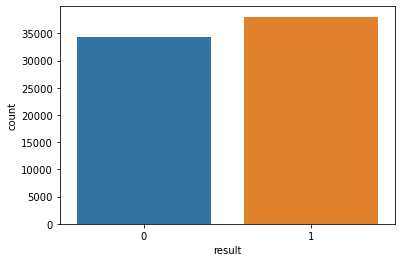

In [65]:
sns.countplot(delivery_df["result"]);

In [68]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left',
                        'balls_left','wickets','total_runs_x','cur_run_rate',
                        'req_run_rate','result']]

final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,cur_run_rate,req_run_rate,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,209,119,10,210,6.0,1254.0,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,209,118,10,210,3.0,627.0,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,209,117,10,210,2.0,418.0,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,116,10,210,4.5,310.5,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,203,115,10,210,8.4,243.6,0


In [69]:
final_df.shape

(72413, 10)

In [70]:
final_df.isnull().sum()

batting_team      0
bowling_team      0
city            832
runs_left         0
balls_left        0
wickets           0
total_runs_x      0
cur_run_rate      0
req_run_rate      0
result            0
dtype: int64

In [71]:
#dropping the null values

final_df=final_df.dropna()
final_df.isnull().sum()

batting_team    0
bowling_team    0
city            0
runs_left       0
balls_left      0
wickets         0
total_runs_x    0
cur_run_rate    0
req_run_rate    0
result          0
dtype: int64

In [72]:
#most critical step

final_df=final_df[final_df["balls_left"]!=0]

In [73]:
data=final_df.copy()

In [85]:
y=data["result"]

In [86]:
y

125       0
126       0
127       0
128       0
129       0
         ..
149572    0
149573    0
149574    0
149575    0
149576    0
Name: result, Length: 71342, dtype: int64

In [92]:
X=data.drop(["result"],axis=1)

In [93]:
X

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,cur_run_rate,req_run_rate
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,209,119,10,210,6.000000,1254.000000
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,209,118,10,210,3.000000,627.000000
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,209,117,10,210,2.000000,418.000000
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,116,10,210,4.500000,310.500000
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,203,115,10,210,8.400000,243.600000
...,...,...,...,...,...,...,...,...,...
149572,Chennai Super Kings,Mumbai Indians,Hyderabad,4,5,5,155,7.878261,0.208696
149573,Chennai Super Kings,Mumbai Indians,Hyderabad,3,4,5,155,7.862069,0.155172
149574,Chennai Super Kings,Mumbai Indians,Hyderabad,1,3,5,155,7.897436,0.051282
149575,Chennai Super Kings,Mumbai Indians,Hyderabad,0,2,4,155,7.881356,0.000000


In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [96]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,cur_run_rate,req_run_rate
22755,Rajasthan Royals,Kings XI Punjab,Cape Town,134,110,9,142,4.800000,80.400000
149502,Chennai Super Kings,Mumbai Indians,Hyderabad,94,73,9,155,7.787234,12.000000
4619,Mumbai Indians,Royal Challengers Bangalore,Mumbai,95,66,8,165,7.777778,10.555556
90058,Kolkata Knight Riders,Kings XI Punjab,Abu Dhabi,96,65,7,135,4.254545,10.472727
135658,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata,104,48,8,192,7.333333,8.666667
...,...,...,...,...,...,...,...,...,...
103573,Rajasthan Royals,Sunrisers Hyderabad,Visakhapatnam,119,108,10,130,5.500000,59.500000
43015,Deccan Chargers,Royal Challengers Bangalore,Bangalore,92,50,7,187,8.142857,7.885714
44720,Delhi Daredevils,Mumbai Indians,Mumbai,89,43,4,186,7.558442,6.935065
105544,Royal Challengers Bangalore,Chennai Super Kings,Bangalore,148,89,8,184,6.967742,28.645161


In [97]:
X_train.columns

Index(['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets', 'total_runs_x', 'cur_run_rate', 'req_run_rate'],
      dtype='object')

In [98]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [100]:
cf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
],remainder='passthrough')

In [101]:
pipe = Pipeline(steps=[
    ('step1',cf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [103]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [104]:
y_pred = pipe.predict(X_test)

In [105]:
print(metrics.accuracy_score(y_test,y_pred))

0.8050318873081506


In [108]:
pipe.predict_proba(X_test)[0]

array([0.27329762, 0.72670238])

In [109]:
#random forest
pipe2 = Pipeline(steps=[
    ('step1',cf),
    ('step2',RandomForestClassifier())
])


In [110]:
pipe2.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', RandomForestClassifier())])

In [111]:
print(metrics.accuracy_score(y_test,pipe2.predict(X_test)))

0.9990889340528418


In [112]:
pipe2.predict_proba(X_test)[0]

array([0.96, 0.04])

In [113]:
#saving logistic reg model
import pickle

In [114]:
pickle.dump(pipe,open('pipe.pkl','wb'))